# INTRODUCTION

The project is the part of our module of data analytics program offered by codeme hub , calicut. It is based on an income prediction.The goal is to train a binary classifier to predict the income which has two possible values '>50K' and '<50K'. Income classification plays a crucial role in various real-world applications, such as credit risk assessment, targeted marketing, and economic analysis. 
Machine learning (ML) has emerged as a powerful tool for automating and improving the accuracy of income classification. By leveraging complex algorithms and large datasets, ML models can learn the underlying patterns in income data and make intelligent predictions about individuals' income levels.

# OBJECTIVES


- To compare and contrast the performance of  ML algorithms for income classification.

- To identify the most effective model for this specific task.

- To analyze the factors influencing model performance and identify potential limitations.

- To gain insights from the models and understand the relationships between the socioeconomic factors and income levels.


As per the problem statement of the  project, this exploratory report will consists of the 
following:

- Exploratory Data Analysis of dataset given.
     o Basic Data Summary
 
     o Univariate Analysis
 
     o Bivariate Analysis
 
     o Outliers and Missing Values check
 
     o Multicollinearity on the data
 
     o Summary and Insights


- Data Preparation 

     o With Smote and running all the models.



- Building models and assess the performance

     o Logistic Regression and its interpretation



- Actionable Insights
     
     o Interpretations and Recommendation


# IMPORTING LIBRARIES

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [532]:
df=pd.read_csv("incomeData.csv")

In [533]:
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Features:

1. age: continuous. It denotes the age of the person.

2. workclass: It denotes the working class of the 
person. Sample values: Private, Self-emp-not-inc, 
Self-emp-inc, Federal-gov, Local-gov, State-gov, 
Without-pay, Never-worked.

3. fnlwgt: continuous.

4. education: It denotes the educational qualification 
of the person. Sample values: Bachelors, Somecollege, 11th, HS-grad, Prof-school, Assoc-acdm, 
Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 
10th, Doctorate, 5th-6th, Preschool.

5. education-num: continuous. It denotes the 
quantitative values with reference to education. 

6. marital-status: It denotes the marital status of 
the person. Sample values: Married-civ-spouse, 
Divorced, Never-married, Separated, Widowed, 
Married-spouse-absent, Married-AF-spouse.

7. occupation: It denotes the occupation of a person. 
Sample values: Tech-support, Craft-repair, Otherservice, Sales, Exec-managerial, Prof-specialty, 
Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
Farming-fishing, Transport-moving, Priv-house-serv, 
Protective-serv, Armed-Forces.

8. relationship: It denotes the people present in the 
family. Sample values: Wife, Own-child, Husband, 
Not-in-family, Other-relative, Unmarried.

9. race: It denotes the person’s origins. Sample 
values: White, Asian-Pac-Islander, Amer-IndianEskimo, Other, Black.

10. sex: It denotes the person's gender. Sample 
values: Female, Male. 

11. capital-gain: continuous. It denotes the monitory 
gains by the person.

12. capital-loss: continuous. It denotes the monitory 
loss by the person.

13. hours-per-week: continuous. It denotes the number 
of working hours per week by the person.

14. native-country: It denotes the country to which 
the person belongs. Sample values: United-States, 
Cambodia, England, Puerto-Rico, Canada, Germany, 
Outlying-US(Guam-USVI-etc), India, Japan, Greece, 
South, China, Cuba, Iran, Honduras, Philippines, 
Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, 
Ireland, France, Dominican-Republic, Laos, Ecuador, 
Taiwan, Haiti, Columbia, Hungary, Guatemala, 
Nicaragua, Scotland, Thailand, Yugoslavia, ElSalvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands

In [534]:
df.isna().sum()

nan               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [535]:
df.duplicated().sum() # dropping the duplicates

24

In [536]:
df=df.drop_duplicates()

In [537]:
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [538]:
df.dtypes

nan                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [540]:
df.rename(columns={"nan":"Age"},inplace=True)

In [541]:
df.rename(columns={"workclass":"WorkClass"},inplace=True)
df.rename(columns={"fnlwgt":"Final_Weight"},inplace=True)
df.rename(columns={"education":"Education"},inplace=True)
df.rename(columns={"education-num":"Education_Num"},inplace=True)
df.rename(columns={"marital-status":"Marital_Status"},inplace=True)
df.rename(columns={"occupation":"Occupation"},inplace=True)
df.rename(columns={"relationship":"Relationship"},inplace=True)
df.rename(columns={"race":"Race"},inplace=True)
df.rename(columns={"sex":"Sex"},inplace=True)
df.rename(columns={"capital-gain":"Capital_Gain"},inplace=True)
df.rename(columns={"capital-loss":"Capital_Loss"},inplace=True)
df.rename(columns={"hours":"Hours"},inplace=True)

In [542]:
df.rename(columns={"hours-per-week":"Hours_Per_Week"},inplace=True)
df.rename(columns={"native-country":"Native_Country"},inplace=True)


In [543]:

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
WorkClass,32537,9,Private,22673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final_Weight,32537.0,NaN,NaN,NaN,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
Education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,32537.0,NaN,NaN,NaN,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
Marital_Status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32537,15,Prof-specialty,4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [544]:
df.sample(5)

,Age,WorkClass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
15934,33,Self-emp-not-inc,34102,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
29659,66,Private,234743,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,24,United-States,<=50K
11118,36,Private,58602,5th-6th,3,Never-married,Other-service,Not-in-family,White,Male,0,0,35,United-States,<=50K
11055,20,Private,194138,11th,7,Never-married,Craft-repair,Own-child,White,Male,0,0,20,United-States,<=50K
30966,57,Private,301514,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K


In [545]:
df["Marital_Status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [546]:
cols=df.columns

In [547]:
for col in cols :
    print("{} : {}".format(cols,df[col].unique()))
#checking unique values in each variables

Index(['Age', 'WorkClass', 'Final_Weight', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object') : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Index(['Age', 'WorkClass', 'Final_Weight', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income'],
      dtype='object') : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Index(['Age', 'WorkClass', 'Final_Weight', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', '

In [548]:
df["WorkClass"]=df["WorkClass"].replace(" ?",np.nan)

In [549]:
df["WorkClass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [550]:
df["Occupation"]=df["Occupation"].replace(" ?",np.nan)

In [551]:
df["Occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [552]:
df["Native_Country"]=df["Native_Country"].replace(" ?",np.nan)
# replacing "?" with nan using numpy

In [553]:
df.isnull().sum()

Age                  0
WorkClass         1836
Final_Weight         0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     582
Income               0
dtype: int64

In [554]:
df["WorkClass"].fillna(df["WorkClass"].mode()[0],inplace=True)
# filling nan values with mode 

In [555]:
df["Native_Country"].fillna(df["Native_Country"].mode()[0],inplace=True)

In [556]:
df.isna().sum()

Age                  0
WorkClass            0
Final_Weight         0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country       0
Income               0
dtype: int64

In [557]:
df["Occupation"].fillna(df["Occupation"].mode()[0],inplace=True)

In [558]:
df.duplicated().sum()

0

In [559]:
df.head()

,Age,WorkClass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [560]:
df.to_csv("income_data_clean.csv")

In [561]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
WorkClass,32537,8,Private,24509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final_Weight,32537.0,NaN,NaN,NaN,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
Education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,32537.0,NaN,NaN,NaN,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
Marital_Status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32537,14,Prof-specialty,5979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [562]:
df.corr()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
Final_Weight,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
Education_Num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
Capital_Gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
Capital_Loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
Hours_Per_Week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


- there is no specific correlation between variables

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

In [563]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

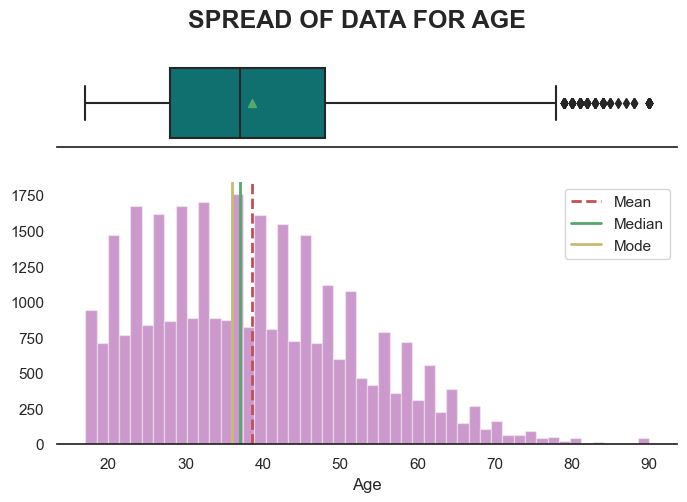

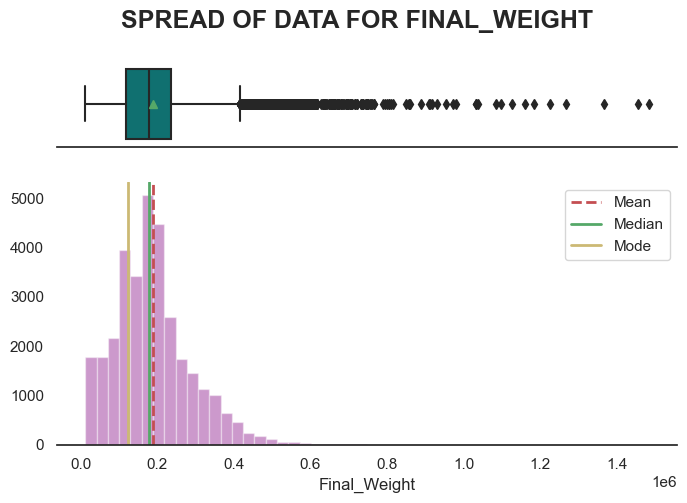

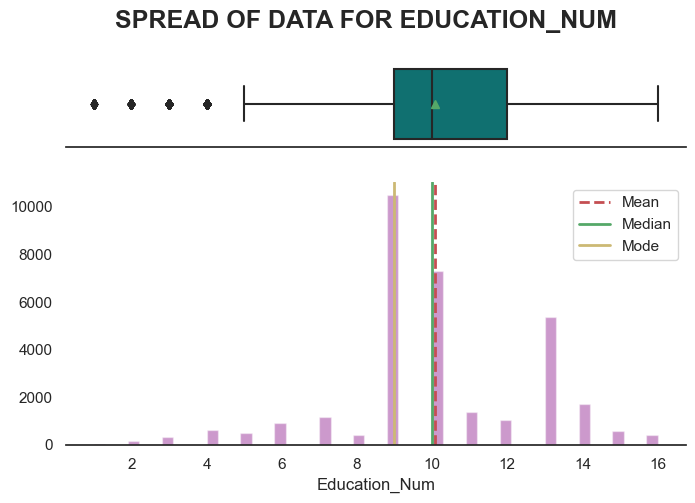

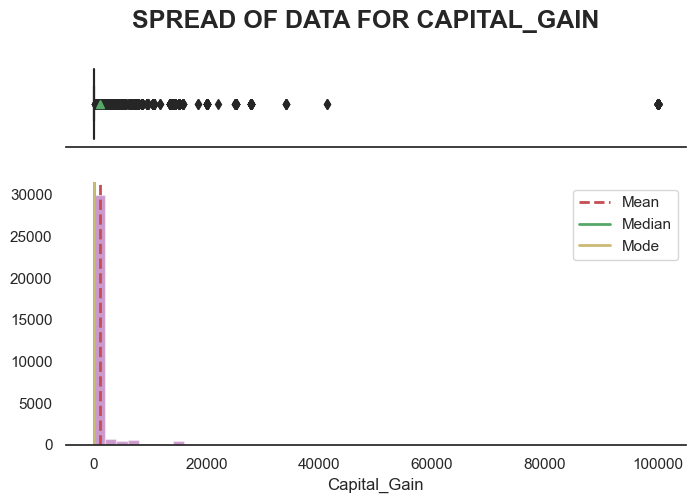

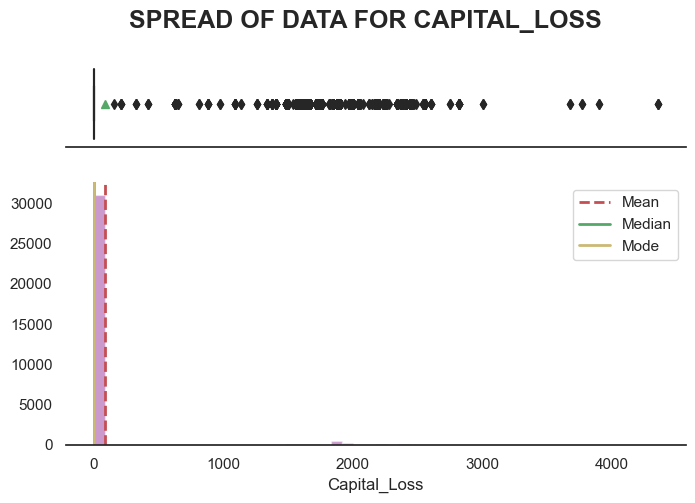

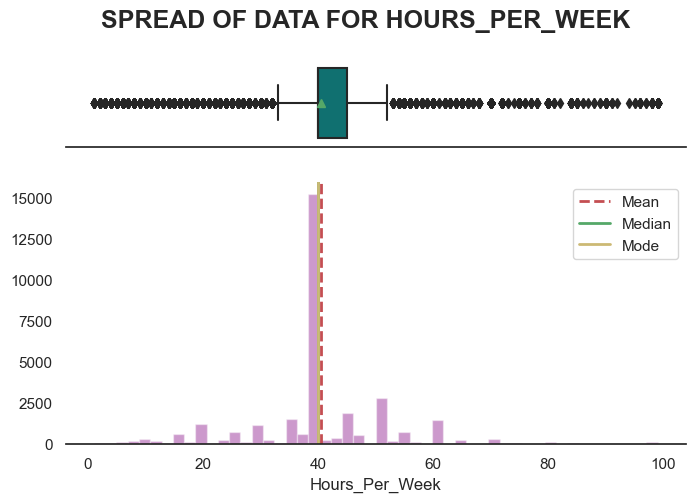

In [564]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

# OBSERVATIONS

- age is not normally distributed and it is having outliers with a mean of 38 median of 37 and mode of nearly in the range of 36
- spread of final weight is almost right distributed we can see some outliers , need to check whether its to be treated
- education number is also not normally distributed mean and median almost fall in the same range of 10 which can be regarded as a basic education in average and mode falls at 9 , there are outliers which is almost left skewed and and having very less education years
- capital gain is having outliers and mainly a bit right skewed
- capital loss is also having outliers 
- hours per week is also having a lot of outliers , it is also not normally distributed

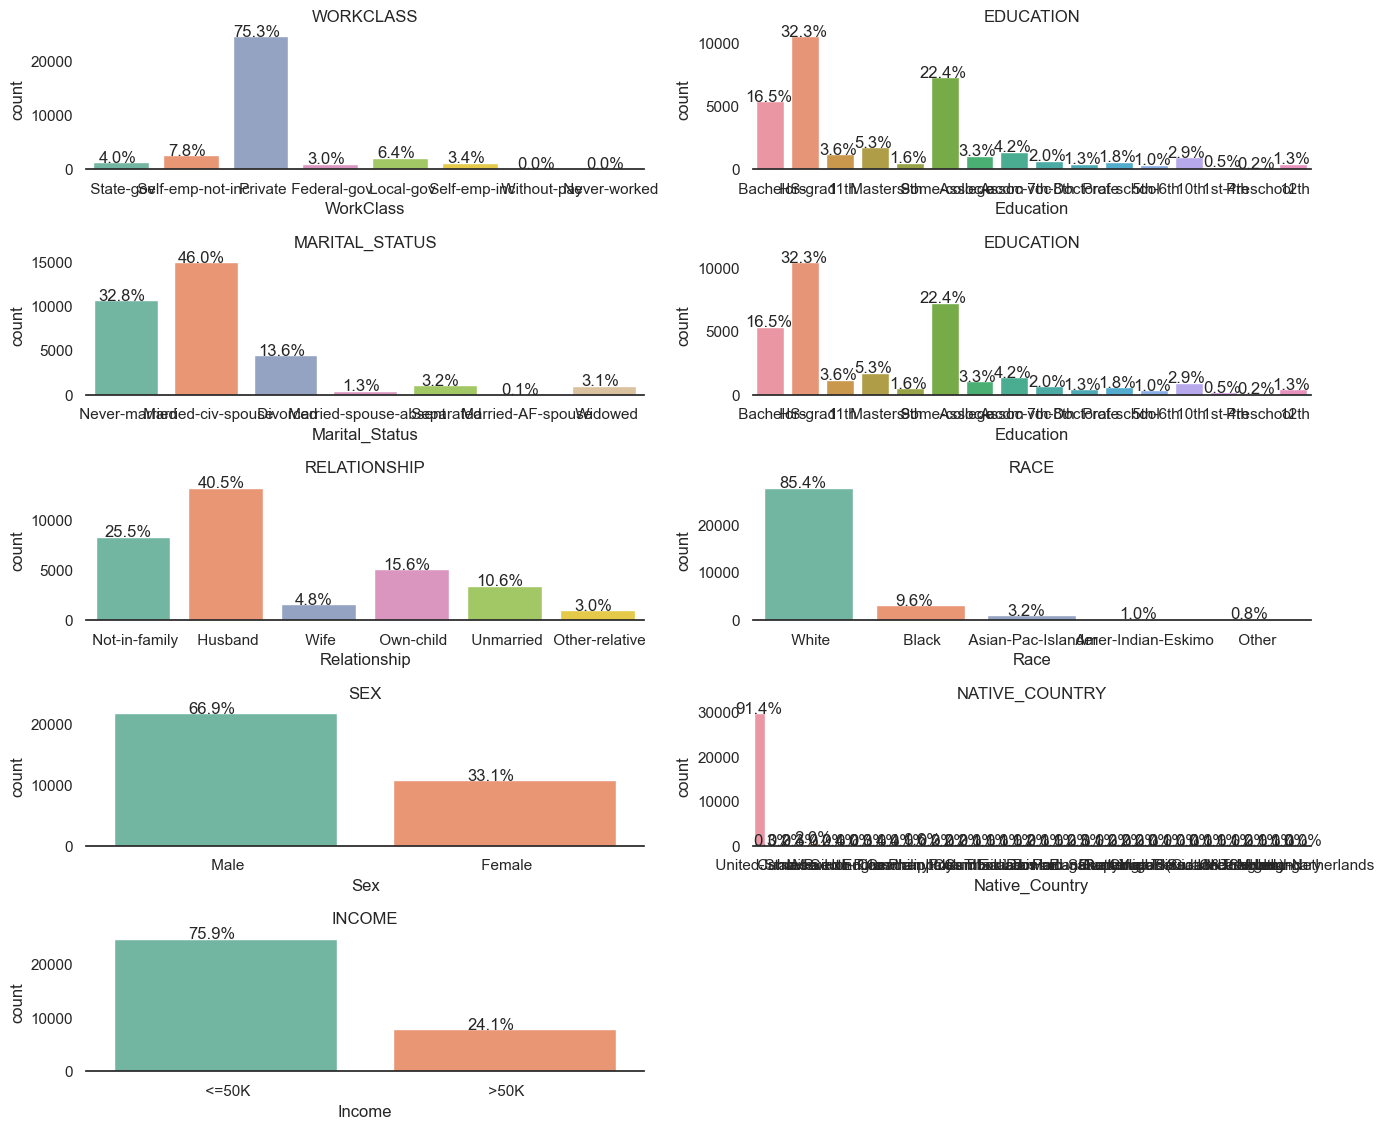

In [565]:
plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=["WorkClass","Education","Marital_Status","Education","Relationship","Race","Sex","Native_Country","Income"]
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = df[variable].value_counts(ascending=False).index   
             #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                           
                     plt.tight_layout()
                     plt.title(cols[i].upper())
                     

- 75.3 % of people are working in private sector
- 32.3% are hs graduate and 22.4% are some college education which is not much specified and 16.5% are having their bachelors
- 40.5 % are non civilian married with spouse , 32.8% are never married ,13.6% are divorced
- 40.5% are husbands,25.5% are not in a family 15.6 % own a child and 10% are never married 
- 85.4 % are white and 9.6% are black
- 66.9% are male and other are female
- 91.4 % falls in US , very least % falls under other countries
- income is less than 50k for 75.9 % and ,24.1% falls under >50k

# Bivariate & Multivariate Analysis

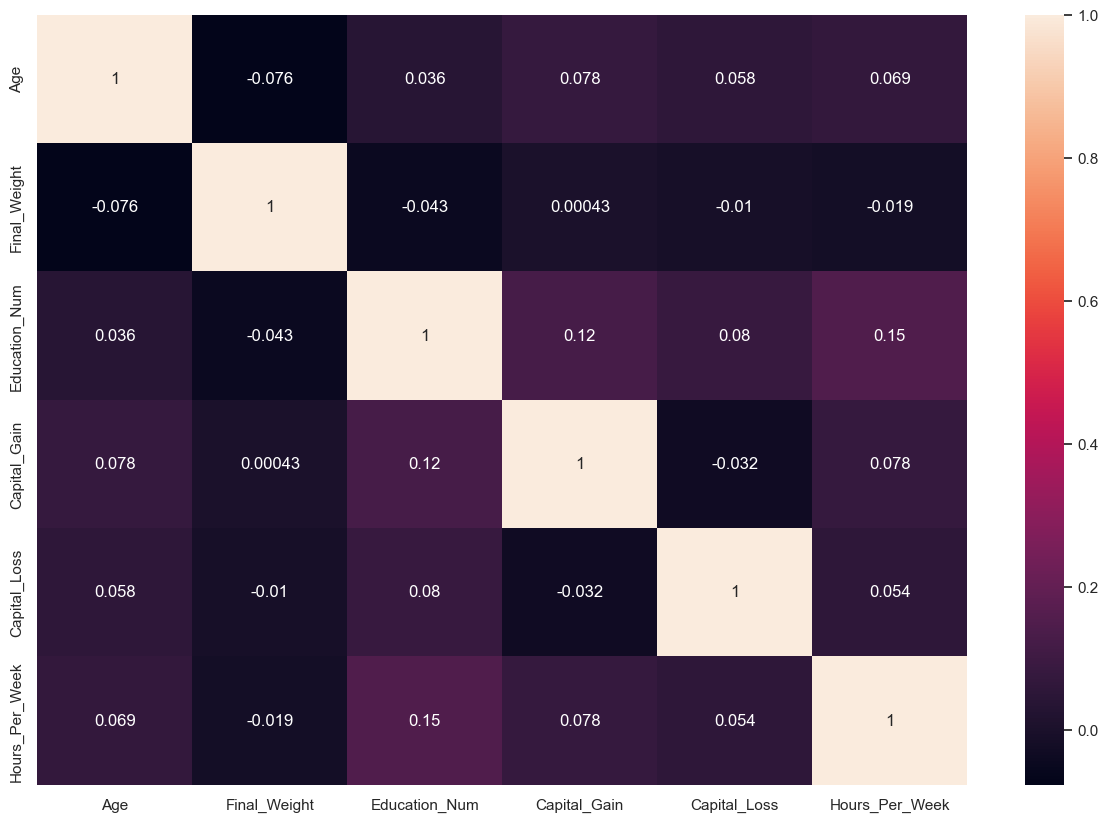

In [566]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

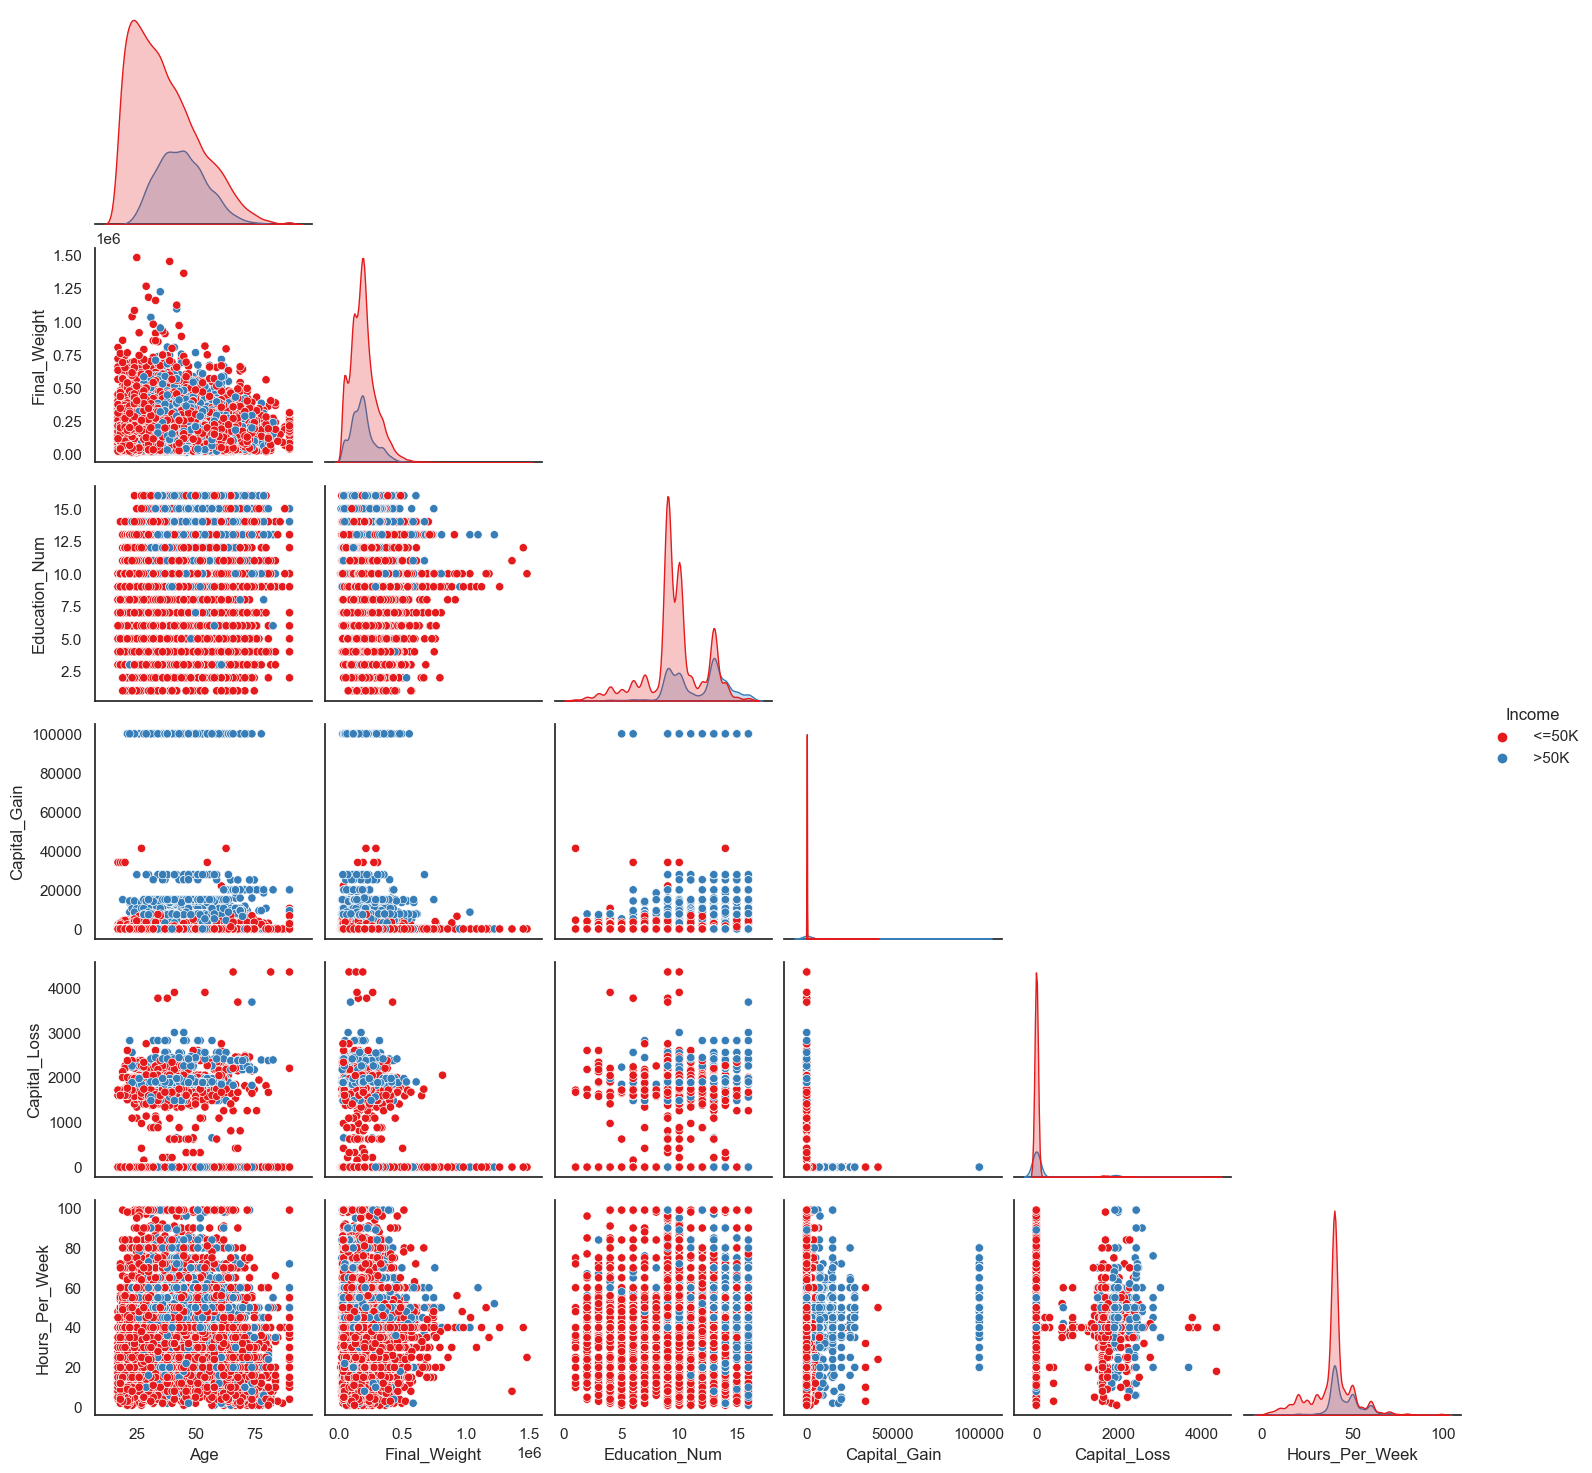

In [567]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df, hue="Income",corner=True)
plt.show()

In [606]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Income'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer whose income greater than 50k',fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == " >50K")][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer whose income less than or equal to 50k",fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == " <=50K")][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Income',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
    sns.boxplot(x=df[target],y=df[x],ax=axs[0,1],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Income - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(x=df[target],y=df[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

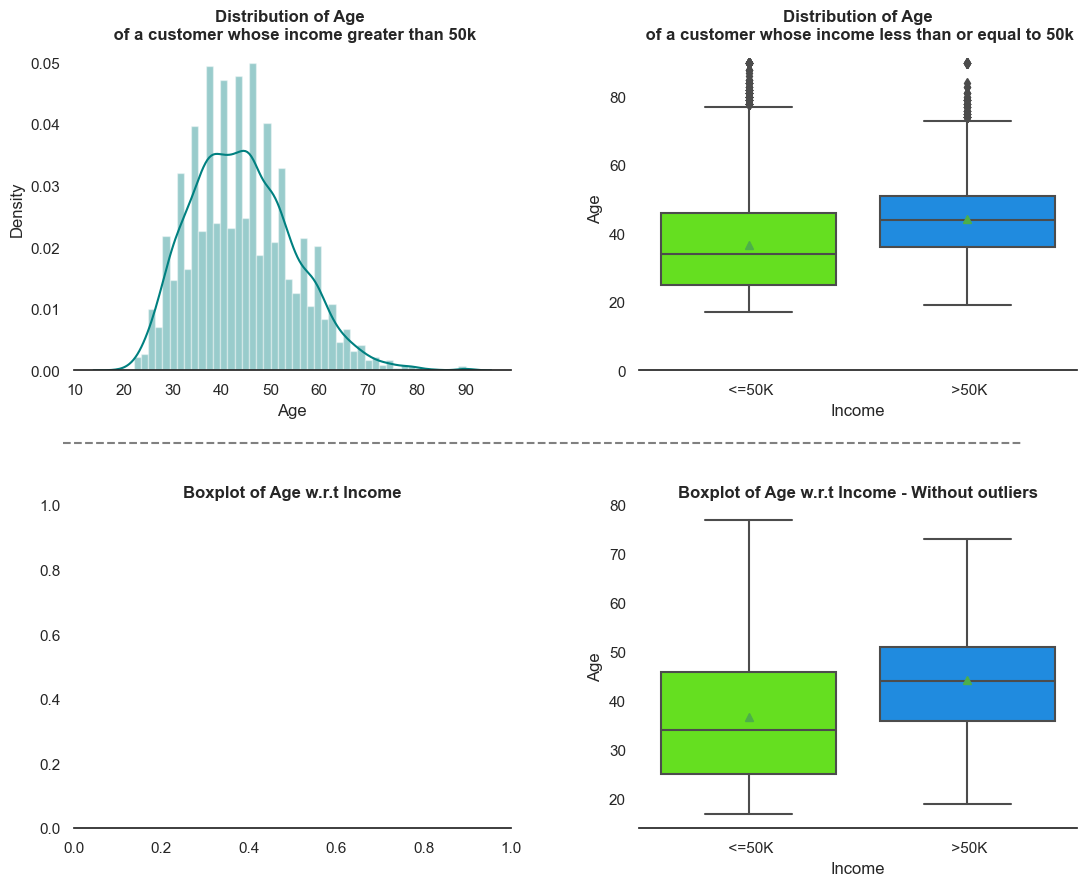

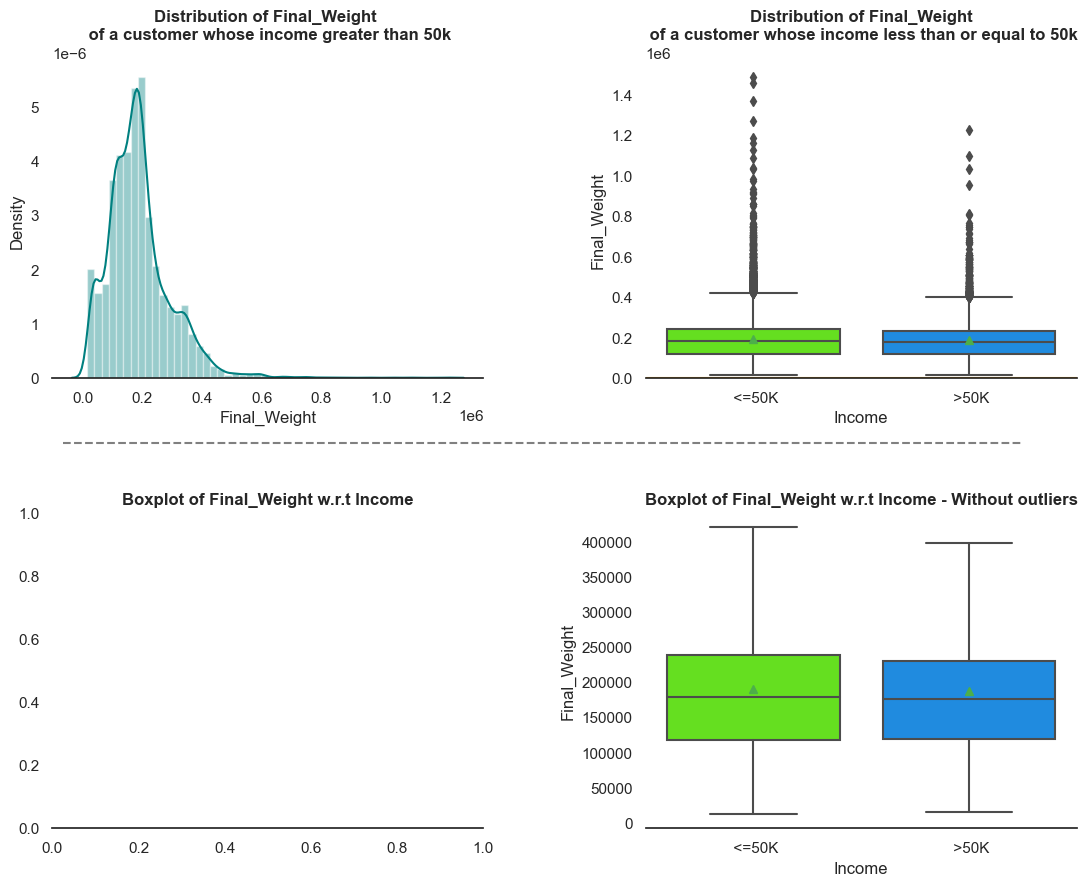

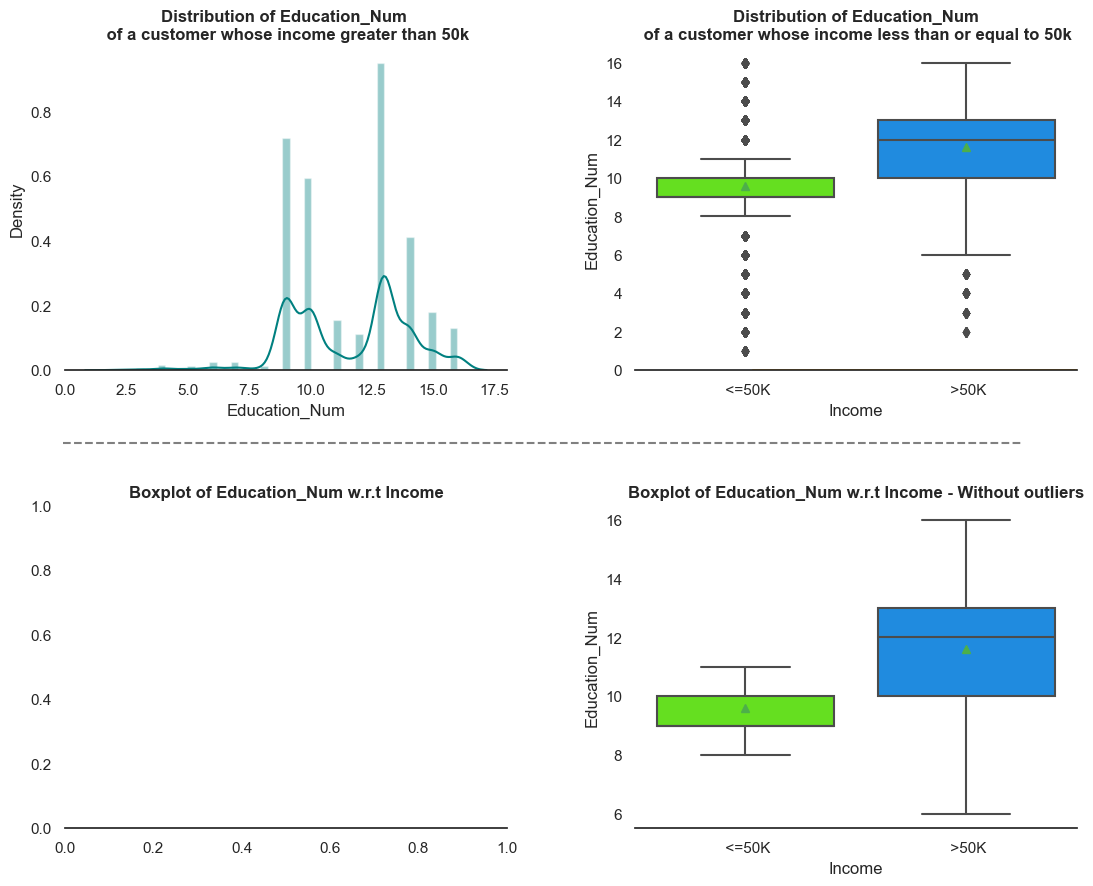

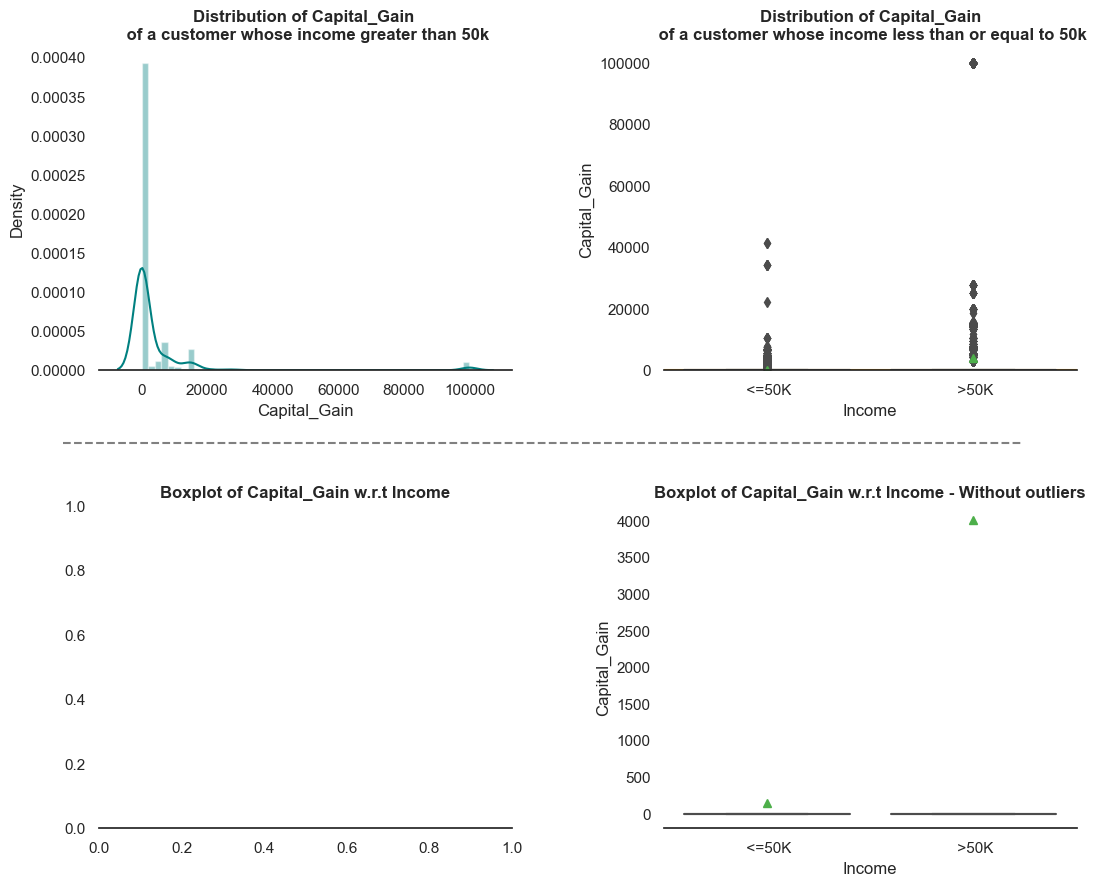

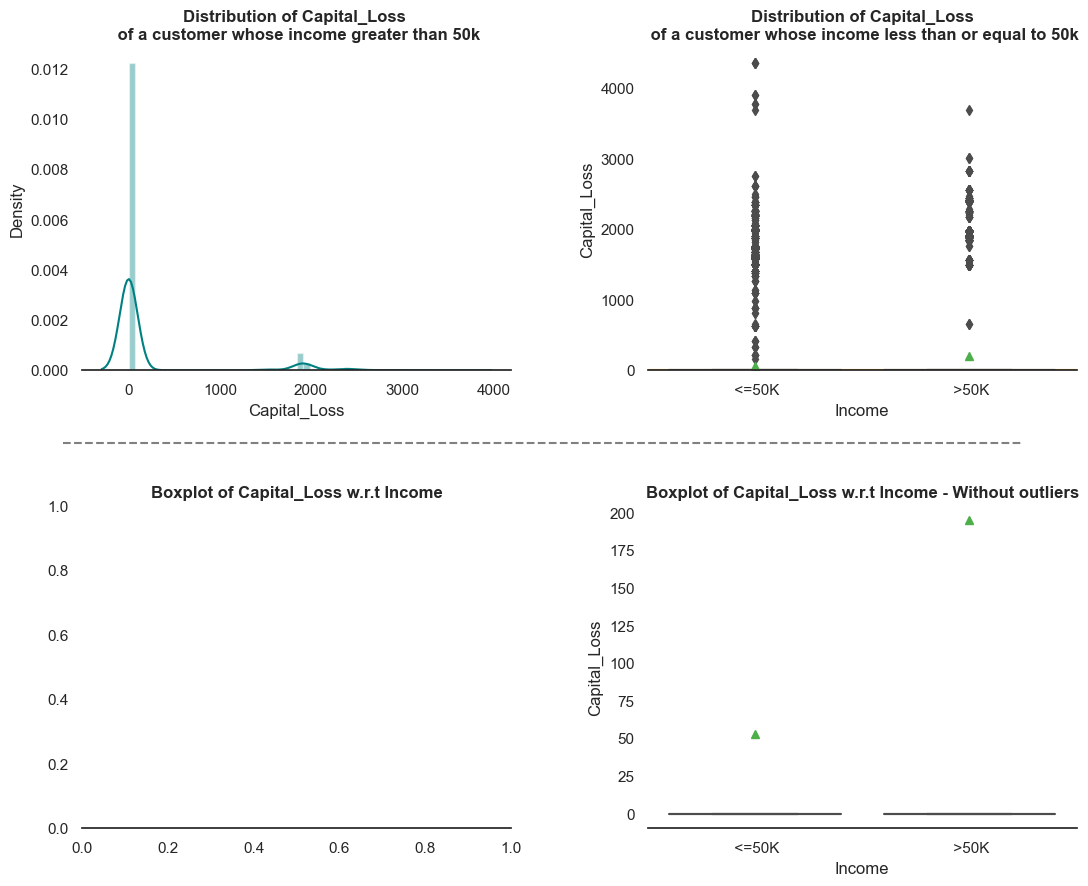

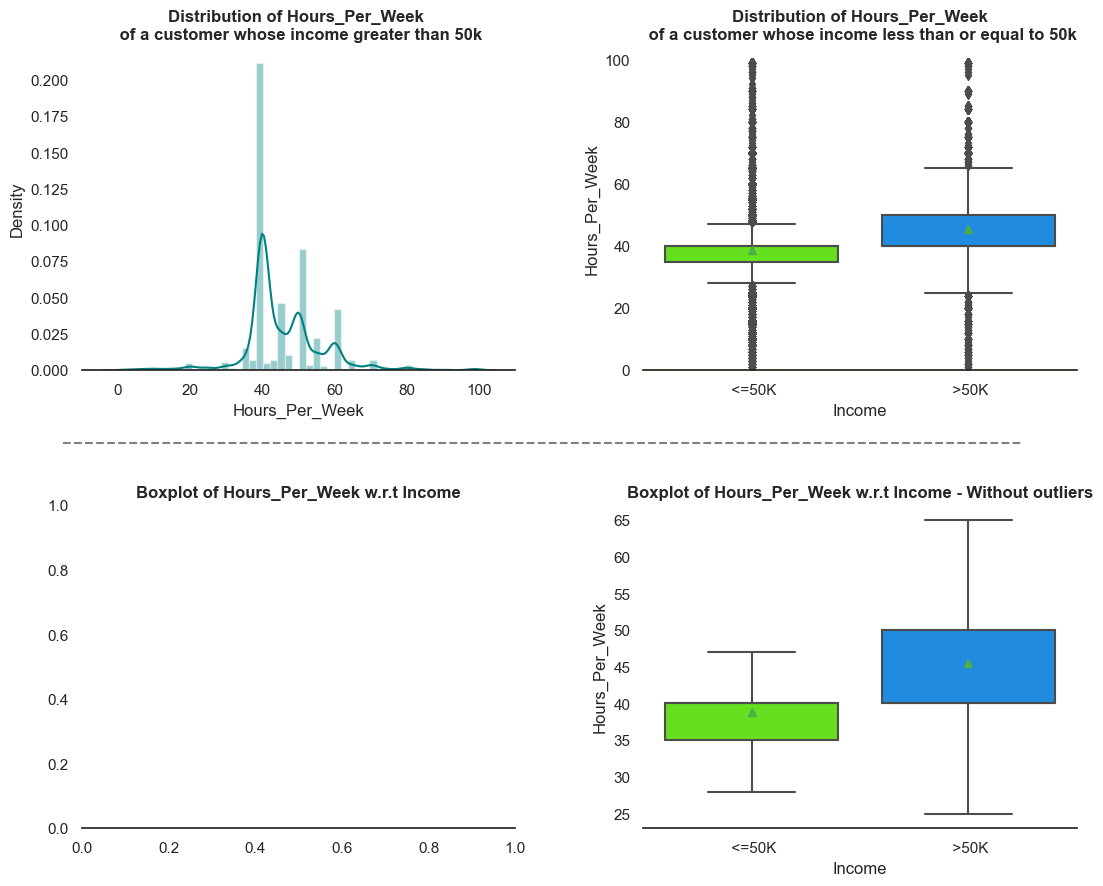

In [607]:
#select all quantitative columns for checking the spread
#list_col=  ['Age']
list_col=df.select_dtypes(include="number").columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
    plot(list_col[j])

    

# OBSERVATIONS

- age is distributed normally for people havig income greater than 50k

- final weight is bit right skewed for peple having higher income

- education number is multimodal where we can see many are having a range of 9,10 and 15

- working hours per week for higher income people is working almost 40,50,60 which tells us hardworks earns income

- 

In [570]:
df.head()

,Age,WorkClass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [571]:

df['Agebin'] = pd.cut(df['Age'], bins = [15,25, 31, 40, 50, 70,90], labels = ['15-25','26-30', '31-40', '41-50', '51-70','71-90'])
#creating age bin so as to find the people in each age group

In [572]:
df["Agebin"].value_counts()

31-40    7655
41-50    6977
15-25    6400
51-70    5920
26-30    5046
71-90     539
Name: Agebin, dtype: int64

In [573]:
df.head()

,Age,WorkClass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income,Agebin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,31-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-70
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,26-30


In [574]:
income_high=df[df["Income"]==" >50K"]
income_high.shape

(7839, 16)

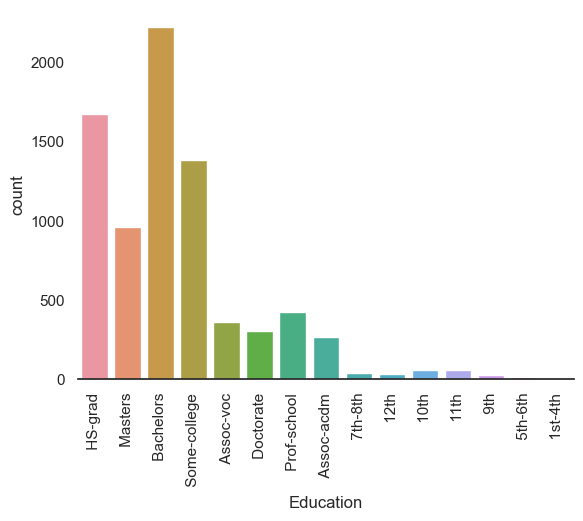

In [575]:
#plt.figure(figsize= [12,12])

sns.countplot(x="Education", data=income_high)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.xticks(rotation=90)
plt.show()

- bachelors degree people are having higher income in count

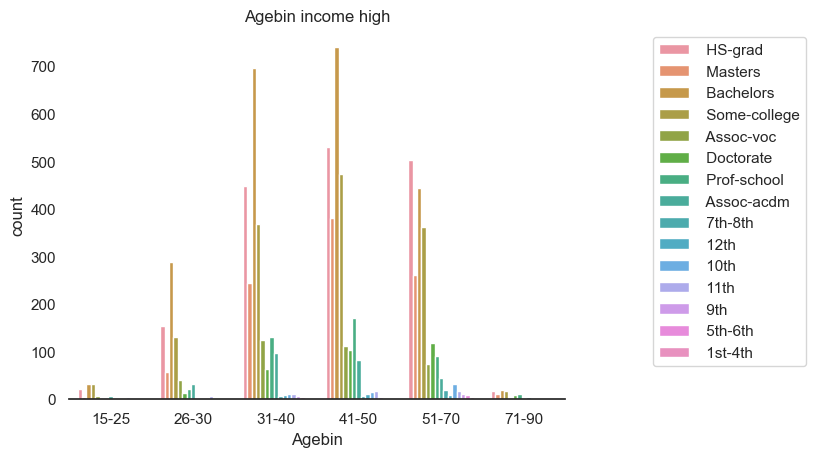

In [652]:
sns.countplot(x='Agebin',hue='Education',data=income_high).set_title('Agebin income high')
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
plt.show()


- according to the above visual high income people mainly fall in the age bin of 31-60 where most of them is having an average education , very less people are having least education

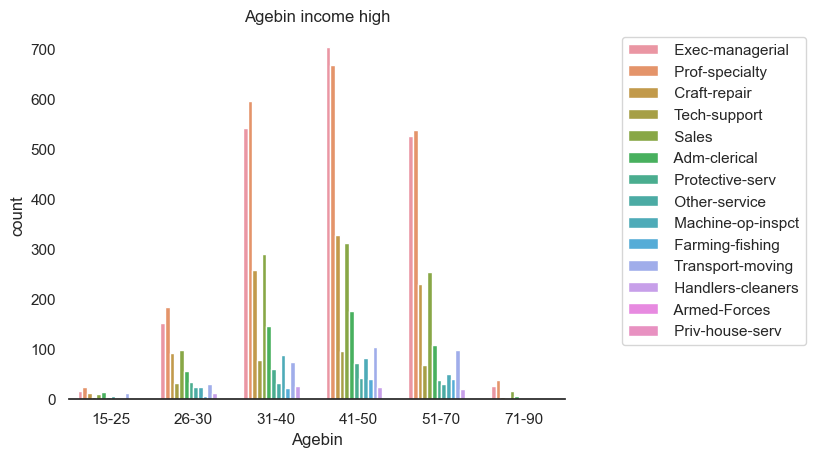

In [653]:
sns.countplot(x='Agebin',hue='Occupation',data=income_high).set_title('Agebin income high')

sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right')
plt.show()

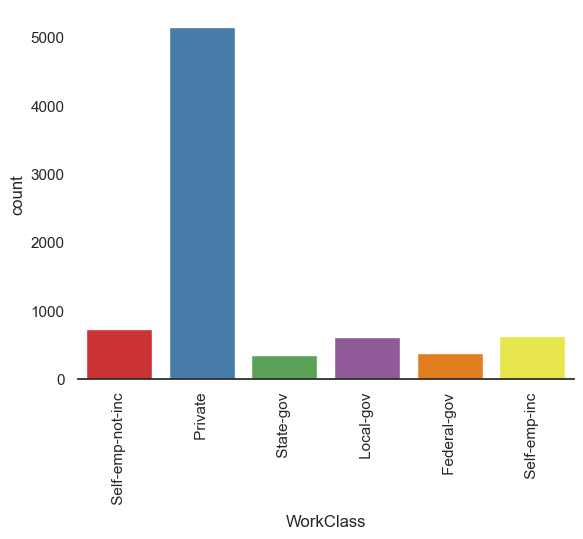

In [578]:
#plt.figure(figsize= [12,12])

sns.countplot(x="WorkClass", data=income_high)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.xticks(rotation=90)
plt.show()

- private sector is earning in high income

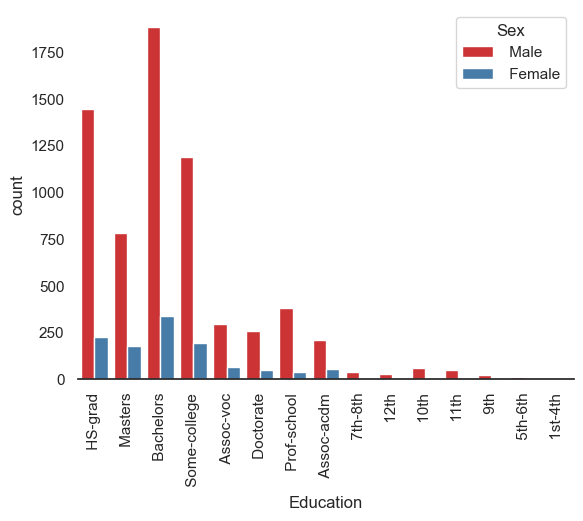

In [579]:
sns.countplot(x="Education", data=income_high,  hue="Sex")
sns.despine(top=True,right=True,left=True)
plt.xticks(rotation=90)
plt.show()

- according the income data more are male with bachelors degree followed by hs grad and then some college

In [580]:
df.to_csv("income_new.csv")

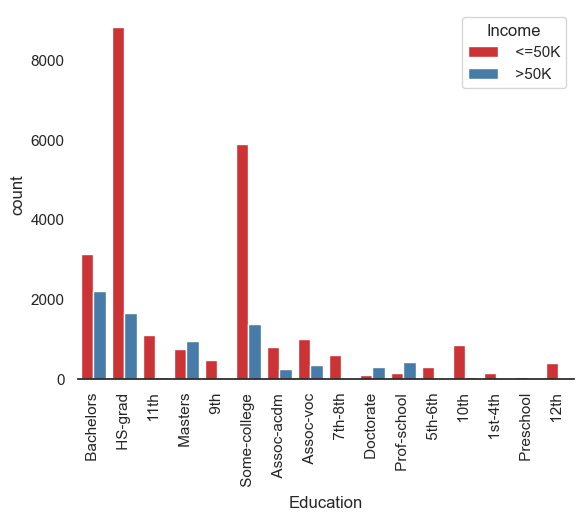

In [584]:
sns.countplot(x="Education",data=df,hue="Income")
plt.xticks(rotation=90)
sns.despine(top=True,right=True,left=True)
plt.show()

- from the above visual we can conclude that education is not the biggest criteria make big incomes

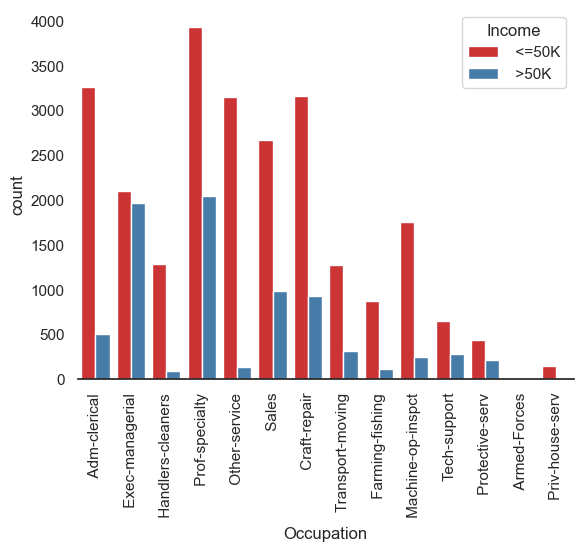

In [585]:
sns.countplot(x="Occupation",data=df,hue="Income")
plt.xticks(rotation=90)
sns.despine(top=True,right=True,left=True)
plt.show()

- prof speciality hold a higher number of people in occupation in both high income and low income

In [586]:
df.head()

,Age,WorkClass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income,Agebin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,31-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-70
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,26-30


In [588]:
income_high["Agebin"].value_counts()

41-50    2654
31-40    2222
51-70    2004
26-30     751
15-25     114
71-90      94
Name: Agebin, dtype: int64

In [589]:
income_high["Education"].value_counts()

 Bachelors       2221
 HS-grad         1674
 Some-college    1386
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: Education, dtype: int64

In [590]:
income_high["Occupation"].value_counts()

 Prof-specialty       2049
 Exec-managerial      1968
 Sales                 983
 Craft-repair          929
 Adm-clerical          507
 Transport-moving      320
 Tech-support          283
 Machine-op-inspct     249
 Protective-serv       211
 Other-service         137
 Farming-fishing       115
 Handlers-cleaners      86
 Armed-Forces            1
 Priv-house-serv         1
Name: Occupation, dtype: int64

In [591]:
income_high["Native_Country"].value_counts()

 United-States         7315
 Philippines             61
 Germany                 44
 India                   40
 Canada                  39
 Mexico                  33
 England                 30
 Italy                   25
 Cuba                    25
 Japan                   24
 Taiwan                  20
 China                   20
 Iran                    18
 South                   16
 Puerto-Rico             12
 Poland                  12
 France                  12
 Jamaica                 10
 El-Salvador              9
 Greece                   8
 Cambodia                 7
 Hong                     6
 Yugoslavia               6
 Ireland                  5
 Vietnam                  5
 Portugal                 4
 Haiti                    4
 Ecuador                  4
 Thailand                 3
 Hungary                  3
 Guatemala                3
 Scotland                 3
 Nicaragua                2
 Trinadad&Tobago          2
 Laos                     2
 Columbia           

In [592]:
income_high["Race"].value_counts()

 White                 7115
 Black                  387
 Asian-Pac-Islander     276
 Amer-Indian-Eskimo      36
 Other                   25
Name: Race, dtype: int64

In [593]:
income_high["Sex"].value_counts()

 Male      6660
 Female    1179
Name: Sex, dtype: int64

# OBSERVATIONS

- when classified high income people who were greater than 50k 41-50 age group people had more income in this category

- more people were from US and were white people

- more people had prof speciality and educ managerial post which tells us more were placed in a higher post with higher salar

- more were males which tells us women are still to be brought forward

In [596]:
income_low=df[df["Income"]==" <=50K"]

In [597]:
income_low.head()

,Age,WorkClass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income,Agebin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,31-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-70
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,26-30


In [598]:
income_low["Agebin"].value_counts()

15-25    6286
31-40    5433
41-50    4323
26-30    4295
51-70    3916
71-90     445
Name: Agebin, dtype: int64

In [599]:
income_low["Sex"].value_counts()

 Male      15115
 Female     9583
Name: Sex, dtype: int64

In [600]:
income_low["Occupation"].value_counts()

 Prof-specialty       3930
 Adm-clerical         3261
 Craft-repair         3165
 Other-service        3154
 Sales                2667
 Exec-managerial      2097
 Machine-op-inspct    1751
 Handlers-cleaners    1283
 Transport-moving     1277
 Farming-fishing       877
 Tech-support          644
 Protective-serv       438
 Priv-house-serv       146
 Armed-Forces            8
Name: Occupation, dtype: int64

In [601]:
income_low["Education"].value_counts()

 HS-grad         8820
 Some-college    5896
 Bachelors       3132
 11th            1115
 Assoc-voc       1021
 10th             871
 Assoc-acdm       802
 Masters          763
 7th-8th          605
 9th              487
 12th             400
 5th-6th          316
 1st-4th          160
 Prof-school      153
 Doctorate        107
 Preschool         50
Name: Education, dtype: int64

In [651]:
income_low["Capital_Loss"].max()

4356

# OBSERVATIONS

- more people were male in low income , here also the role for females is less 

- more people were with hs graduation followed by some college education , in high income also hs graduate stands in a higher value counts which tells us education is not the only factor which brings higher income , but skills

- more people occupation was prof speciality as well as administrative clerical level , which tells us the salary under a specific post is not the main source

- low income people were mainly in 15-25 age group , mainly because of less experience and the studies ongoing with work brings less income

In [608]:
df=df.drop(["Agebin","Education","Final_Weight"],axis=1)

In [609]:
df1=df.copy()

# CLASSIFICATION USING LOGISTIC REGRESSION

In [610]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


### converting target variable to binary 

In [611]:
from sklearn import preprocessing

In [612]:

lab_enc=preprocessing.LabelEncoder()

In [613]:
x=df.copy()

In [614]:
for col in x:
    x[col]=lab_enc.fit_transform(x[col].values)

In [615]:
x

,Age,WorkClass,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,22,6,12,4,0,1,4,1,25,0,39,38,0
1,33,5,12,2,3,0,4,1,0,0,12,38,0
2,21,3,8,0,5,1,4,1,0,0,39,38,0
3,36,3,6,2,5,0,2,1,0,0,39,38,0
4,11,3,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,11,2,12,5,4,0,0,0,37,38,0
32557,23,3,8,2,6,0,4,1,0,0,39,38,1
32558,41,3,8,6,0,4,4,0,0,0,39,38,0
32559,5,3,8,4,0,3,4,1,0,0,19,38,0


In [616]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x.iloc[:,0:-1], x['Income'])

print('Original dataset shape', len(x))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 32537
Resampled dataset shape 49396


In [617]:
x_smote

,Age,WorkClass,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country
0,22,6,12,4,0,1,4,1,25,0,39,38
1,33,5,12,2,3,0,4,1,0,0,12,38
2,21,3,8,0,5,1,4,1,0,0,39,38
3,36,3,6,2,5,0,2,1,0,0,39,38
4,11,3,12,2,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...
49391,29,1,13,2,9,0,4,1,0,0,59,38
49392,13,3,12,2,11,0,4,1,0,0,49,38
49393,14,3,12,2,2,0,4,1,0,0,39,38
49394,19,3,9,2,9,0,1,1,0,0,36,29


In [618]:
y_smote

0        0
1        0
2        0
3        0
4        0
        ..
49391    1
49392    1
49393    1
49394    1
49395    1
Name: Income, Length: 49396, dtype: int32

In [619]:
X=x_smote
y=y_smote

In [620]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [621]:
from sklearn.linear_model import LogisticRegression

In [622]:
logisticreg=LogisticRegression()

In [623]:
logisticreg

LogisticRegression()

In [624]:
logisticreg.fit(X_train,y_train)

LogisticRegression()

In [625]:
y_pred=logisticreg.predict(X_test)

In [626]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [648]:
y_prob = logisticreg.predict_proba(X_test)[:, 1]

# EVALUATION MATRICES

In [627]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [628]:
acc=accuracy_score(y_test,y_pred)

In [629]:
print("accuracy : ",acc)

accuracy :  0.765587044534413


In [630]:
prec=precision_score(y_test,y_pred)

In [631]:
print("precision score : ",prec)

precision score :  0.7532619279454722


In [632]:
recall=recall_score(y_test,y_pred)

In [633]:
print("recall_score : ",recall)

recall_score :  0.7866585316249746


In [634]:
f1=f1_score(y_test,y_pred)

In [635]:
print("f1_score : ",f1)

f1_score :  0.7695980899323518


In [636]:
confusion=confusion_matrix(y_test,y_pred)

In [637]:
print("confusion_matrix : ",confusion)

confusion_matrix :  [[3696 1267]
 [1049 3868]]


evaluation matrices have been evaluated and given below : 
    
- Accuracy_score =  0.765587044534413
- Precision_score = 0.7532619279454722
- Recall_score =  0.7866585316249746
- f1_score =  0.7695980899323518
- confusion_matrix =  [[3696 1267]
 [1049 3868]]

In [649]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

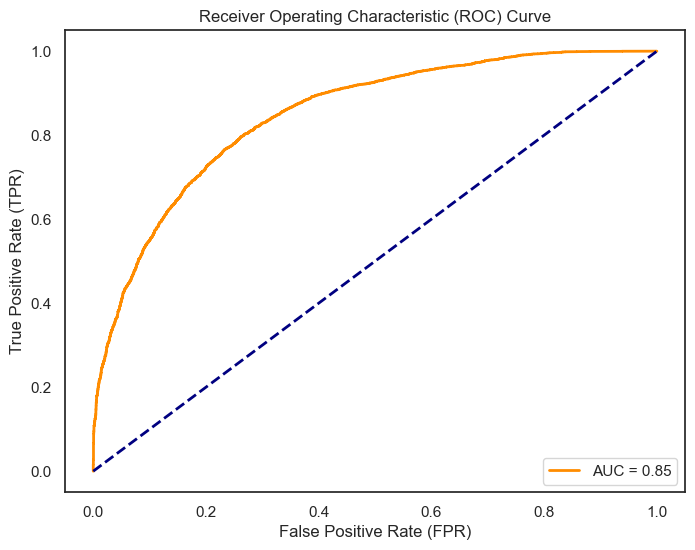

In [650]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# CONCLUSION

- here for model creation i used logistic regression as the problem was based on classification

- accuracy score was 76.5% and recall score 78.6% which shows the model built was a good one for classification , so that if a new data was entered it will be classified to the correct one

- auc is 85% which tells A model with an AUC above 0.8 is generally considered good and can effectively distinguish between the classes. This indicates the model makes few mistakes in both classifying positive and negative cases.so the model created is a good one

- As many of the features like gender , race , country , have more than 80% of data skewed to a certain point we cant clearly say how the classification goes and predict it well because mainly the data falls in US , males white people and all